<a href="https://colab.research.google.com/github/pathan33/IPLScorePrediction/blob/main/IPL_Score_Predict_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IPL 1st Inning Score Prediction using Machine Learning
The Dataset contains ball by ball information of the matches played between IPL Teams of </b>Season 1 to 10</b>, i.e. from 2008 to 2017.<br/>

This Machine Learning model adapts a Regression Approach to predict the score of the First Inning of an IPL Match.<br/>

The Dataset can be downloaded from Kaggle from [here](https://www.kaggle.com/yuvrajdagur/ipl-dataset-season-2008-to-2017)


## Understanding the DATASET <br/>

The dataset consists of 15 columns: <br/>
<ol><li><b>mid</b>: The match id to uniquely identify each match.</li>
<li><b>date</b>: The date on which the match was held. </li>
<li><b>venue</b>: The name of the stadium. </li>
<li><b>bat_team</b>: The batting team name. </li>
<li><b>bowl_team</b>: The bowling team name. </li>
<li><b>batsman</b>: The name of the batsman. </li>
<li><b>bowler</b>: The name of the bowler. </li>
<li><b>runs</b>: The runs scored till now. </li>
<li><b>wickets</b>: The wickets taken till now. </li>
<li><b>overs</b>: The number of overs bowled. </li>
<li><b>runs_last_5</b>: The number of runs scored in last 5 overs. </li>
<li><b>wickets_last_5</b>: The number of wickets taken in last 5 overs. </li>
<li><b>striker</b>: The name of the batsmen on the batting end. </li>
<li><b>non-striker</b>: The name of the batsmen on the bowling end. </li>
<li><b>total</b>: The total number of runs scored in the match.</li></ol></br>



# A Step by step approach:

1. Exploratory Data Analysis
2. Feature Engineering and Selection
3. Compare Multiple Algorithms
4. Perform Hyperparameter Tuning
5. Evaluate the models
6. Deploy the model

# Import Necessary Libraries

In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Mount the Google Drive and save the dataset in the Drive name "ipl.csv"**

In [2]:
# Reading the data from drive and creating a Dataframe
df = pd.read_csv('/content/drive/MyDrive/Google Colab/Machine Learning Model/IPL 1st Innings Score prediction/ipl.csv')
print(f'Shape of the dataset is : {df.shape}')

Shape of the dataset is : (76014, 15)


**Display the top 5 records**

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


# 1. Exploratory Data Analysis
# 2. Feature Engineering and Selection

In [4]:
# checking for missing values in the dataset
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [5]:
# unique labels in features
for col in df.columns:
  print(col, ":", len(df[col].unique()), "labels")

mid : 617 labels
date : 442 labels
venue : 35 labels
bat_team : 14 labels
bowl_team : 14 labels
batsman : 411 labels
bowler : 329 labels
runs : 252 labels
wickets : 11 labels
overs : 140 labels
runs_last_5 : 102 labels
wickets_last_5 : 8 labels
striker : 155 labels
non-striker : 88 labels
total : 138 labels


In [6]:
# Number of Unique Values in each column
df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

In [7]:
# datatype of columns
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

#### Data Cleaning and formatting

In [8]:
# --- Data Cleaning ---
# Removing unwanted columns
cols_to_remove = ['date','mid', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=cols_to_remove, axis=1, inplace=True)

In [9]:
# Data after removing columns
df.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Selecting most used Stadiums

In [10]:
# Unique Venues
print(f"Current Venues : \n{df['venue'].unique()}")

df.head()

Current Venues : 
['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Maharashtra Cricket Association Stadium'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Saurasht

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [11]:
# Lets check most of the used Stadiums
df['count'] = 1
df.groupby('venue')['count'].count().sort_values(ascending=False)

venue
M Chinnaswamy Stadium                                   7443
Feroz Shah Kotla                                        7068
Eden Gardens                                            7049
Wankhede Stadium                                        7048
MA Chidambaram Stadium, Chepauk                         5972
Rajiv Gandhi International Stadium, Uppal               5827
Punjab Cricket Association Stadium, Mohali              4247
Sawai Mansingh Stadium                                  4110
Dr DY Patil Sports Academy                              2088
Subrata Roy Sahara Stadium                              2086
Maharashtra Cricket Association Stadium                 1843
Kingsmead                                               1731
Sardar Patel Stadium, Motera                            1484
Brabourne Stadium                                       1380
SuperSport Park                                         1377
Punjab Cricket Association IS Bindra Stadium, Mohali    1342
Saurashtra Cricket

Now that we know how many times a stadium is being used, we can choose only the top stadiums which have most data for our model prediction.

In [12]:
# selecting most used stadiums 
df.groupby('venue')['count'].count().sort_values(ascending=False).head(10).index

Index(['M Chinnaswamy Stadium', 'Feroz Shah Kotla', 'Eden Gardens',
       'Wankhede Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Rajiv Gandhi International Stadium, Uppal',
       'Punjab Cricket Association Stadium, Mohali', 'Sawai Mansingh Stadium',
       'Dr DY Patil Sports Academy', 'Subrata Roy Sahara Stadium'],
      dtype='object', name='venue')

In [13]:
# Data before and after removing less used Stadiums (venues)
current_venues = ['M Chinnaswamy Stadium', 'Feroz Shah Kotla', 'Eden Gardens',
       'Wankhede Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Rajiv Gandhi International Stadium, Uppal',
       'Punjab Cricket Association Stadium, Mohali', 'Sawai Mansingh Stadium',
       'Dr DY Patil Sports Academy','Subrata Roy Sahara Stadium']

# Data before removing most used Venues
print(f'Data shape before removing less used Stadiums : {df.shape}')

df = df[df['venue'].isin(current_venues)]

# Data after removing most used Venues
print(f'Data shape after removing less used Stadiums : {df.shape}')

Data shape before removing less used Stadiums : (76014, 10)
Data shape after removing less used Stadiums : (52938, 10)


#### Keeping only Consistent Teams 
(teams that never change even in current season)

In [14]:
# Unique teams
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant'], dtype=object)

In [15]:
# Defining Consistent Teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', 'Mumbai Indians',
                   'Kings XI Punjab', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad']

In [16]:
# Data before and after removing Inconsistent teams 
print(f'Before Removing Inconsistent Teams : {df.shape}')
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

print(f'After Removing Irrelevant Teams : {df.shape}')
print(f"Consistent Teams : \n{df['bat_team'].unique()}")

df.head()

Before Removing Inconsistent Teams : (52938, 10)
After Removing Irrelevant Teams : (39112, 10)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,count
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222,1
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222,1
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222,1
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222,1
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222,1


In [17]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

In [18]:
# Shape of the data after removing the first 5 overs data
df.shape

(29145, 10)

In [19]:
# Dropping the column count from dataframe
df.drop(['count'],axis=1,inplace=True)

### Data Preprocessing

In [20]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team', 'venue'])
encoded_df.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Dr DY Patil Sports Academy,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Subrata Roy Sahara Stadium,venue_Wankhede Stadium
32,61,0,5.1,59,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
33,61,1,5.2,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
34,61,1,5.3,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
35,61,1,5.4,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
36,61,1,5.5,58,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [21]:
# printing all the columns from 'encoded_df' DataFrame
encoded_df.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Dr DY Patil Sports Academy',
       'venue_Eden Gardens', 'venue_Feroz Shah Kotla',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Subrata Roy Sahar

In [22]:
# Rearranging the columns
final_df = encoded_df[['bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Dr DY Patil Sports Academy',
       'venue_Eden Gardens', 'venue_Feroz Shah Kotla',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Subrata Roy Sahara Stadium',
       'venue_Wankhede Stadium', 'overs','runs', 'wickets', 'runs_last_5', 'wickets_last_5',
       'total']]

In [23]:
# selecting top 5 records in 'final_df' Dataframe
final_df.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Dr DY Patil Sports Academy,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Subrata Roy Sahara Stadium,venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,5.1,61,0,59,0,222
33,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,5.2,61,1,59,1,222
34,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,5.3,61,1,59,1,222
35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,5.4,61,1,59,1,222
36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,5.5,61,1,58,1,222


### Dividing the data into X(Dependent Features) and y(Independent Features)

In [24]:
# Dividing data into Dependent and Independent Features
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [25]:
X.head(2)

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Dr DY Patil Sports Academy,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Subrata Roy Sahara Stadium,venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5
32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,5.1,61,0,59,0
33,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,5.2,61,1,59,1


In [26]:
y.head(2)

32    222
33    222
Name: total, dtype: int64

In [27]:
# train_testa_split of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### Defining a dictionary to store the model's accuracy

In [28]:
# creating a dictionarty to store the model's accuracy
models = dict()
print(models)

{}


# LinearRegression

In [29]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

# Instantiating the LinearRegression Model
linear_reg = LinearRegression()

# Fitting the linear_regression object on training data
linear_reg.fit(X_train,y_train)

# Predicting the data
y_pred = linear_reg.predict(X_test)

In [30]:
### --- Linear Regression - Model Evaluation ---
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# calculate R2 score to measure the accuracy of our model
print('R2 of LinearRegression model: ', r2_score(y_test,y_pred))

R2 of LinearRegression model:  0.6652941707313291


In [31]:
# checking the test score of linear regression model
test_score_linreg = linear_reg.score(X_test, y_test)
test_score_linreg

# adding the linreg score in models dict
models["linreg"] = test_score_linreg
print(models)

{'linreg': 0.6652941707313291}


In [32]:
## Linear Regression - Model Evaluation
print("---- Linear Regression - Model Evaluation ----")

print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test, y_pred)))
print("Root Mean Absolute Error (MAE): {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.854475647225243
Mean Squared Error (MSE): 297.8946618721768
Root Mean Absolute Error (MAE): 17.259625195008635


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


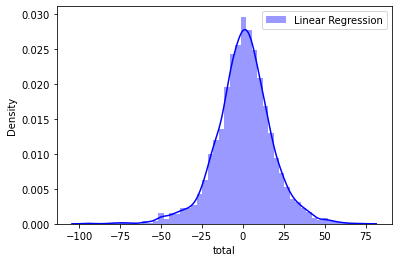

In [33]:
# checking the distribution of test and predicted values
import seaborn as sns
sns.distplot(y_test - y_pred, hist=True, color="b",label='Linear Regression')
plt.legend()

In this plot we can observe that most of our values are 0 or close to 0. Therefore we can state that the Linear regression model works fine. 

But still lets fine tune our model by using Ridge and Lasso Regressor and apply Hyperparameter Tuning techniques on it :)

# Ridge Regressor

In [34]:
# Import necessary libraries
from sklearn.linear_model import Ridge                  # Ridge Regressor - Regularization
from sklearn.model_selection import RepeatedKFold       # RepeatedKFold - CrossValidation
from sklearn.model_selection import RandomizedSearchCV  # RandomizedSearchCV - Hyperparameter Tuning

# Instantiating/Defining model
ridge = Ridge()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space/parameters for Hyperparameter Tuning
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1,5,10,20,30,35,40],
              'normalize':[True,False]
             }

# define search (ridge_regressor)
ridge_regressor = RandomizedSearchCV(ridge, parameters, scoring='r2', n_jobs=-1, cv=cv, random_state=1)

# execute search (ridge_regressor) on Training data
ridge_regressor.fit(X_train,y_train)

# summarize result
print('Best Score: %s' % ridge_regressor.best_score_)
print('Best Hyperparameters: %s' % ridge_regressor.best_params_)
print('Best Estimator: {}'.format(ridge_regressor.best_estimator_))

Best Score: 0.6651836377901927
Best Hyperparameters: {'normalize': False, 'alpha': 5}
Best Estimator: Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [35]:
### --- Ridge Regression - Model Evaluation ---
y_pred_ridge = ridge_regressor.predict(X_test)

# calculate R2 score to measure the accuracy of our model
print('R2 of Ridge Regressor model: ', r2_score(y_test,y_pred_ridge))

R2 of Ridge Regressor model:  0.6652894322759502


In [36]:
# checking the test score of Ridge regression model
test_score_ridge = ridge_regressor.score(X_test, y_test)
test_score_ridge

# adding the ridge_regressor score in models dict
models["ridge"] = test_score_ridge
print(models)

{'linreg': 0.6652941707313291, 'ridge': 0.6652894322759502}


In [37]:
## Ridge Regression - Model Evaluation
print("---- Ridge Regression - Model Evaluation ----")

print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test, y_pred_ridge)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test, y_pred_ridge)))
print("Root Mean Absolute Error (MAE): {}".format(np.sqrt(mean_squared_error(y_test, y_pred_ridge))))

---- Ridge Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.853717025060403
Mean Squared Error (MSE): 297.89887918911444
Root Mean Absolute Error (MAE): 17.25974736747657


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


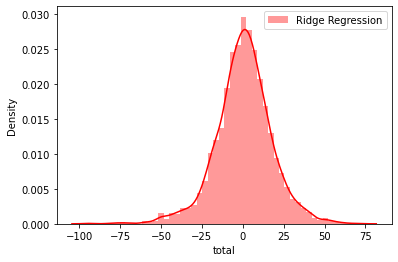

In [38]:
# checking the distribution of test and predicted values
import seaborn as sns
sns.distplot(y_test - y_pred_ridge, hist=True, color="r",label='Ridge Regression')
plt.legend()

After regularizing the model using Ridge Regression, there is no much difference in the model's performance and the Error Metrics. 

Lets check the model's metrics using Lasso Regression.

# Lasso Regression

In [39]:
# Lasso Regression
from sklearn.linear_model import Lasso                  # Lasso Regressor - Regularization
from sklearn.model_selection import RepeatedKFold       # RepeatedKFold - CrossValidation
from sklearn.model_selection import RandomizedSearchCV  # RandomizedSearchCV - Hyperparameter Tuning

# Instantiating/Defining model
lasso = Lasso()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space/parameters for Hyperparameter Tuning
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1,5,10,20,30,35,40,50,55,60,65,70,80,90.,95,100],
              'normalize':[True,False]
             }

# define search (lasso_regressor)
lasso_regressor = RandomizedSearchCV(lasso, parameters, scoring='r2', n_jobs=-1, cv=cv, random_state=1)

# execute search (lasso_regressor)
lasso_regressor.fit(X_train,y_train)

# summarize result
print('Best Score: %s' % lasso_regressor.best_score_)
print('Best Hyperparameters: {}'.format(lasso_regressor.best_params_))
print('Best Estimator: {}'.format(lasso_regressor.best_estimator_))

Best Score: 0.665181385209721
Best Hyperparameters: {'normalize': True, 'alpha': 1e-10}
Best Estimator: Lasso(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211326.91996070556, tolerance: 2111.707835353408
  positive)


In [40]:
### --- Lasso Regression - Model Evaluation ---
y_pred_lasso = lasso_regressor.predict(X_test)

# calculate R2 score to measure the accuracy of our model
print('R2 of Ridge Regressor model: ', r2_score(y_test,y_pred_lasso))

R2 of Ridge Regressor model:  0.6652941708367742


In [41]:
# checking the test score/predictions on Ridge regression model
test_score_lasso = lasso_regressor.score(X_test, y_test)
test_score_lasso

# adding the lasso_regressor score in models dict
models["lasso"] = test_score_lasso
print(models)

{'linreg': 0.6652941707313291, 'ridge': 0.6652894322759502, 'lasso': 0.6652941708367742}


In [42]:
## Ridge Regression - Model Evaluation
print("---- Lasso Regression - Model Evaluation ----")

print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test, y_pred_lasso)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test, y_pred_lasso)))
print("Root Mean Absolute Error (MAE): {}".format(np.sqrt(mean_squared_error(y_test, y_pred_lasso))))

---- Lasso Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.854475639623109
Mean Squared Error (MSE): 297.8946617783286
Root Mean Absolute Error (MAE): 17.259625192289914


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


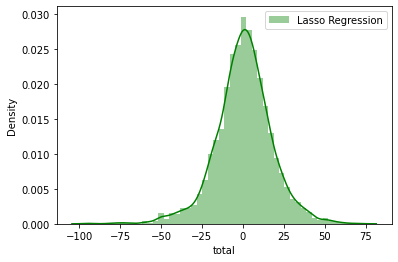

In [43]:
# checking the distribution of test and predicted values
import seaborn as sns
sns.distplot(y_test - y_pred_lasso, hist=True, color="g",label='Lasso Regression')
plt.legend()

After regularizing the model using Lasso Regression, there is no difference in the model's performance and the Error Metrics compared to LinearRegression and Ridge Regression.

Lets plot the distribution of data for models (Linear, Ridge and Lasso Regression).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

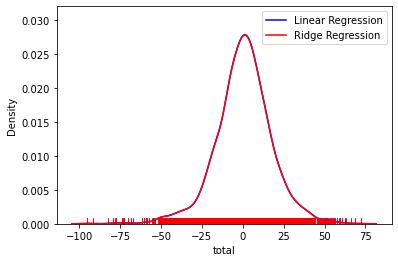

In [44]:
# Plotting the distribution of Linear and Ridge Regression
import seaborn as sns
fig, ax = plt.subplots()
sns.distplot(y_test-y_pred, hist=False, rug=True, color='b', ax=ax, label='Linear Regression')
sns.distplot(y_test-y_pred_ridge, hist=False, rug=True, color='r', ax=ax, label='Ridge Regression')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

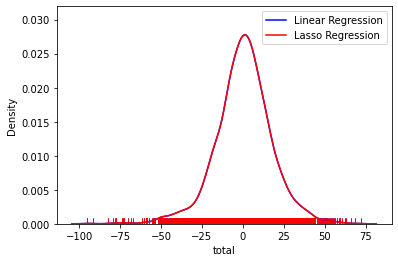

In [45]:
# Plotting the distribution of Linear and Lasso Regression
import seaborn as sns
fig, ax = plt.subplots()
sns.distplot(y_test-y_pred, hist=False, rug=True, color='b', ax=ax, label='Linear Regression')
sns.distplot(y_test-y_pred_lasso, hist=False, rug=True, color='r', ax=ax, label='Lasso Regression')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

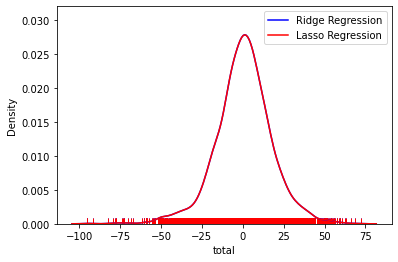

In [46]:
# Plotting the distribution of Ridge and Lasso Regression
import seaborn as sns
fig, ax = plt.subplots()
sns.distplot(y_test-y_pred_ridge, hist=False, rug=True, color='b', ax=ax, label='Ridge Regression')
sns.distplot(y_test-y_pred_lasso, hist=False, rug=True, color='r', ax=ax, label='Lasso Regression')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

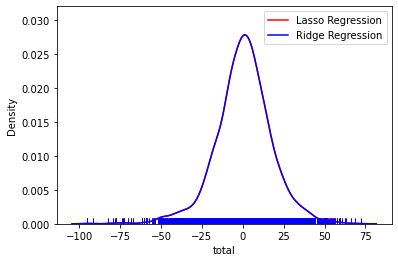

In [47]:
# Plotting the distribution of Lasso and Ridge Regression
import seaborn as sns
fig, ax = plt.subplots()
sns.distplot(y_test-y_pred_lasso, hist=False, rug=True, color='r', ax=ax, label='Lasso Regression')
sns.distplot(y_test-y_pred_ridge, hist=False, rug=True, color='b', ax=ax, label='Ridge Regression')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

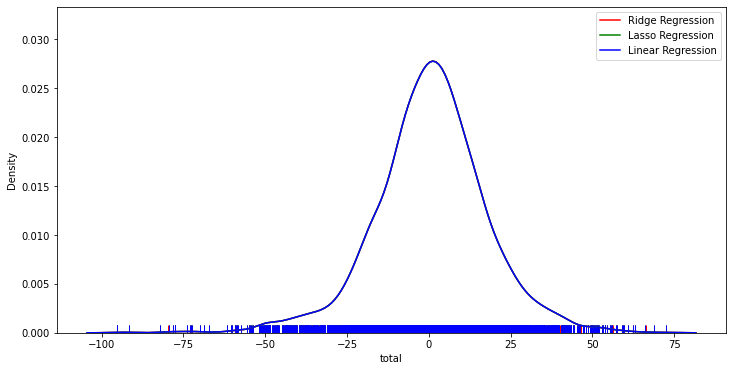

In [48]:
# Plotting the distribution of Linear, Ridge and Lasso Regression
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(y_test-y_pred_ridge, hist=False, rug=True, color='r', ax=ax, label='Ridge Regression')
sns.distplot(y_test-y_pred_lasso, hist=False, rug=True, color='g', ax=ax, label='Lasso Regression')
sns.distplot(y_test-y_pred, hist=False, rug=True, color='b', ax=ax, label='Linear Regression')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

- From the above plot, it is evident that in LinearRegression most of our values are 0 or close to 0, compared to Ridge and Lasso. 
- Therefore we can state that the Linear regression model works fine.

# DecisionTree Regressor

In [49]:
# Importing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiating the DecisionTreeRegressor Model
dt_reg = DecisionTreeRegressor()

# Fitting the DecisionTreeRegressor object on training data
dt_reg.fit(X_train,y_train)

# Predicting the data
y_pred_dt = dt_reg.predict(X_test)

In [50]:
### --- DecisionTreeRegressor - Model Evaluation ---
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# calculate R2 score to measure the accuracy of our model
print('R2 of DecisionTreeRegressor model: ', r2_score(y_test,y_pred_dt))

R2 of DecisionTreeRegressor model:  0.8997922143985336


In [51]:
# checking the test score/predictions on DecisionTreeRegressor model
test_score_dt = dt_reg.score(X_test, y_test)
test_score_dt

# adding the dt_reg score in models dict
models["DT"] = test_score_dt
print(models)

{'linreg': 0.6652941707313291, 'ridge': 0.6652894322759502, 'lasso': 0.6652941708367742, 'DT': 0.8997922143985336}


In [52]:
## DecisionTreeRegressor - Model Evaluation
print("---- DecisionTreeRegressor - Model Evaluation ----")

print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test, y_pred_dt)))
print("Root Mean Absolute Error (MAE): {}".format(np.sqrt(mean_squared_error(y_test, y_pred_dt))))

---- DecisionTreeRegressor - Model Evaluation ----
Mean Absolute Error (MAE): 2.596586035340539
Mean Squared Error (MSE): 89.18686738720191
Root Mean Absolute Error (MAE): 9.443879890553559


# RandomForestRegressor

In [53]:
# Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiating the RandomForestRegressor Model
rf_reg = RandomForestRegressor()

# Fitting the RandomForestRegressor object on training data
rf_reg.fit(X_train,y_train)

# Predicting the data
y_pred_rf = rf_reg.predict(X_test)

In [54]:
### --- RandomForestRegressor - Model Evaluation ---
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# calculate R2 score to measure the accuracy of our model
print('R2 of RandomForestRegressor model: ', r2_score(y_test,y_pred_rf))

R2 of RandomForestRegressor model:  0.9575453152661199


- RandomForestRegressor model turns out to be high performing model out of Linear, Ridge and Lasso Regressors. 
- One can fine tune the parameters and improve the models performance.

In [55]:
# checking the test score/predictions on RandomForestRegressor model
test_score_rf = rf_reg.score(X_test, y_test)
test_score_rf

# adding the rf_reg score in models dict
models["rf"] = test_score_rf
print(models)

{'linreg': 0.6652941707313291, 'ridge': 0.6652894322759502, 'lasso': 0.6652941708367742, 'DT': 0.8997922143985336, 'rf': 0.9575453152661199}


In [56]:
## RandomForestRegressor - Model Evaluation
print("---- RandomForestRegression - Model Evaluation ----")

print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test, y_pred_rf)))
print("Root Mean Absolute Error (MAE): {}".format(np.sqrt(mean_squared_error(y_test, y_pred_rf))))

---- RandomForestRegression - Model Evaluation ----
Mean Absolute Error (MAE): 3.1848296162863843
Mean Squared Error (MSE): 37.78549056442405
Root Mean Absolute Error (MAE): 6.146990366384516


- We could see that, the error has been reduced in RandomForestRegressor compared to other models.
- One can fine tune the model by selecting right parameters i.e. by doing Hyperparameter tuning.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


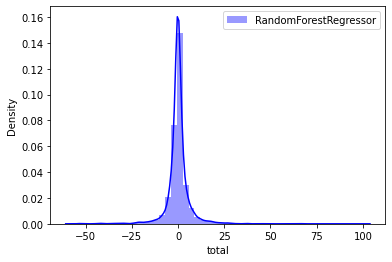

In [57]:
# checking the distribution of test and predicted values
import seaborn as sns
sns.distplot(y_test - y_pred_rf, hist=True, color="b",label='RandomForestRegressor')
plt.legend()

### Hyperparameter Tuning in RandomForestRegressor

The main parameters used by a Random Forest Classifier are:

- criterion = the function used to evaluate the quality of a split.
- max_depth = maximum number of levels allowed in each tree.
- max_features = maximum number of features considered when splitting a node.
- min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
- min_samples_split = minimum number of samples necessary in a node to cause node splitting.
- n_estimators = number of trees in the ensemble.

## Please note, as my machine configuration is not that great, I have not done the Parameter Tuning, one can run the below cell quotes and select/find best parameters. 

#### RandomizedSearchCV

In [ ]:
# Randomized SearchCV
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Maximum no of levels in a tree 
max_depth = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]

# Maximum no of features to be considered while splitting a node
max_features=['sqrt','auto','log2']

# Minimum no of samples required at each leaf node
min_samples_leaf = [1,2,4,6,7,8,10]

# Minimum no of samples to be considered at split a node
min_samples_split = [2,5,10,14,16]

# No of trees in RandomForest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# Creating a random grid
random_grid = {
                'max_depth':max_depth,
                'max_features':max_features,
                'min_samples_leaf':min_samples_leaf,
                'min_samples_split':min_samples_split,
                'n_estimators':n_estimators,
                'criterion':['mse']
    
              }
print(random_grid)              

In [ ]:
# Instantiating the RandomForestRegressor
rf = RandomForestRegressor()

# Applying the search/parameters to the RandomizedSearchCV
rf_randomCV = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, 
                                 n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=100)
#fit the randomized model
rf_randomCV.fit(X_train, y_train)

# selecting best parameters
print('Best parameters for RandomForestRegressor using RandomizedSearchCV :{}'.format(rf_randomCV.best_params_))

# selecting best score
print('Best score for RandomForestRegressor using RandomizedSearchCV :{}'.format(rf_randomCV.best_score_))

# selecting best estimator
print('Best estimator for RandomForestRegressor using RandomizedSearchCV :{}'.format(rf_randomCV.best_estimator_))

In [ ]:
# storing the best estimator results in variable 'best_random_grid'
best_random_grid = rf_randomCV.best_estimator_

In [ ]:
# predicting the results on test dataset
prediction = best_random_grid.predict(X_test)

In [ ]:
## RandomForestRegressor - Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("---- RandomForestRegression - Model Evaluation ----")

print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test, prediction)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test, prediction)))
print("Root Mean Absolute Error (MAE): {}".format(np.sqrt(mean_squared_error(y_test, prediction))))

---- RandomForestRegression - Model Evaluation ----
Mean Absolute Error (MAE): 4.339192533540251
Mean Squared Error (MSE): 53.49484803073689
Root Mean Absolute Error (MAE): 7.3140172293163825


In [ ]:
# calculate R2 score to measure the accuracy of our model
print('R2 of our model: ', r2_score(y_test,prediction))

# Support Vector Machine

In [58]:
# Importing SupportVectorRegressor module from svm library
from sklearn.svm import SVR

# Instantiating SVR
svm = SVR()

# Training Model
svm.fit(X_train, y_train)

# Predicting the o/p on Test data
y_pred_svm = svm.predict(X_test)

In [59]:
### --- SupportVectorRegressor - Model Evaluation ---
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# calculate R2 score to measure the accuracy of our model
print('R2 of SupportVectorRegressor model: ', r2_score(y_test,y_pred_svm))

R2 of SupportVectorRegressor model:  0.5398316515529451


In [60]:
# checking the test score/predictions on SVM regression model
test_score_svm = svm.score(X_test, y_test)
test_score_svm

# adding the linreg score in models dict
models["svm"] = test_score_svm
print(models)

{'linreg': 0.6652941707313291, 'ridge': 0.6652894322759502, 'lasso': 0.6652941708367742, 'DT': 0.8997922143985336, 'rf': 0.9575453152661199, 'svm': 0.5398316515529451}


In [61]:
## RandomForestRegressor - Model Evaluation
print("---- RandomForestRegression - Model Evaluation ----")

print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test, y_pred_rf)))
print("Root Mean Absolute Error (MAE): {}".format(np.sqrt(mean_squared_error(y_test, y_pred_rf))))

---- RandomForestRegression - Model Evaluation ----
Mean Absolute Error (MAE): 3.1848296162863843
Mean Squared Error (MSE): 37.78549056442405
Root Mean Absolute Error (MAE): 6.146990366384516


## Best Model Selection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


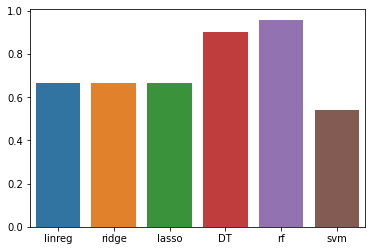

In [62]:
# Plotting barplot to find the best model
import seaborn as sns
model_names = list(models.keys())
accuracy = list(map(float, models.values()))

sns.barplot(model_names, accuracy)

From above, we can see that **Random Forest** performed the best, closely followed by **Decision Tree** and **LinearRegression**. So we will be choosing Random Forest for the final model

In [63]:
final_df.head(1)

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Dr DY Patil Sports Academy,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Subrata Roy Sahara Stadium,venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,5.1,61,0,59,0,222


In [64]:
final_df.columns

Index(['bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Dr DY Patil Sports Academy',
       'venue_Eden Gardens', 'venue_Feroz Shah Kotla',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Subrata Roy Sahara Stadium',
       'venue_Wankhede Stadium', 'overs', 'runs', 'wickets', 'run

# Predictions

In [65]:
# Defining a method to predict the score

def predict_score(batting_team, bowling_team, venue, overs, runs, wickets, runs_last_5, wickets_last_5, model=rf_reg):
  prediction_array = []

  #Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0] 
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]

  #Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0] 
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]

  # Venue
  if venue == 'Dr DY Patil Sports Academy':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0] 
  elif venue == 'Eden Gardens':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0]
  elif venue == 'Feroz Shah Kotla':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0]
  elif venue == 'M Chinnaswamy Stadium':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0]      
  elif venue == 'MA Chidambaram Stadium, Chepauk':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0]
  elif venue == 'Punjab Cricket Association Stadium, Mohali':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0]
  elif venue == 'Rajiv Gandhi International Stadium, Uppal':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0]
  elif venue == 'Sawai Mansingh Stadium':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0]
  elif venue == 'Subrata Roy Sahara Stadium':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0]
  elif venue == 'Wankhede Stadium':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1]  

  prediction_array = prediction_array + [overs, runs, wickets, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

### Test 1
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Chennai Super Kings**
- Final Score : **147/9**

In [66]:
bat_team='Delhi Daredevils'
bowl_team='Chennai Super Kings'
venue = 'Wankhede Stadium'
score = predict_score(bat_team, bowl_team, venue, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 152 || Actual Score : 147


### Test 2
- Batting Team : **Mumbai Indians**
- Bowling Team : **Kings XI Punjab**
- Final Score : **176/7**

In [67]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
venue = 'M Chinnaswamy Stadium'
score = predict_score(batting_team, bowling_team, venue, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 176')

Predicted Score : 187 || Actual Score : 176


### Live Test 1 (2020 season)
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Rajasthan Royals**
- Final Score : **185/4**
<br/>
These Test Was done before the match and final score were added later.

In [68]:
# Live Test
batting_team="Kings XI Punjab"
bowling_team="Rajasthan Royals"
venue = 'Wankhede Stadium'
score = predict_score(batting_team, bowling_team, venue, overs=14.0, runs=118, wickets=1, runs_last_5=45, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 185')

Predicted Score : 188 || Actual Score : 185


### Live Test 2 (2020 Season)
- Batting Team : **Kolkata Knight Riders**
- Bowling Team : **Chennai Super Kings**
- Final Score : **172/5**

In [69]:
# Live Test
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
venue = 'Wankhede Stadium'
score = predict_score(batting_team, bowling_team, venue, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 173 || Actual Score : 172


### Live Test 3 (2020 Season)
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Mumbai Indians**
- Final Score : **110/7**

In [70]:
batting_team='Delhi Daredevils'
bowling_team='Mumbai Indians'
venue = 'Wankhede Stadium'
score = predict_score(batting_team, bowling_team, venue, overs=18.0, runs=96, wickets=8, runs_last_5=18, wickets_last_5=4)
print(f'Predicted Score : {score} || Actual Score : 110')

Predicted Score : 109 || Actual Score : 110


### Live Test 4 (2020 Season)
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Chennai Super Kings**
- Final Score : **153/9**

In [71]:
batting_team='Kings XI Punjab'
bowling_team='Chennai Super Kings'
venue = 'Wankhede Stadium'
score = predict_score(batting_team, bowling_team, venue, overs=18.0, runs=129, wickets=6, runs_last_5=34, wickets_last_5=2)
print(f'Predicted Score : {score} || Actual Score : 153')

Predicted Score : 149 || Actual Score : 153


In [81]:
import bz2

# Pickle a file and then compress it into a file with extension 
def compressed_pickle(title, data):
  with bz2.BZ2File(title, ‘w’) as f:
    cPickle.dump(data, f)


compressed_pickle('random_forest_model.pkl', rf_reg)

SyntaxError: ignored

# Export Model

In [76]:
# Exporting the models to pickle file
import pickle

# Creating a pickle file for the RandomForestRegressor
filename = 'random_forest_model.pkl'
pickle.dump(rf_reg, open(filename,'wb'))

# Creating a pickle file for the DecisionTreeRegressor
filename = 'decision_tree_model.pkl'
pickle.dump(dt_reg, open(filename, 'wb'))


# Creating a pickle file for the LinearRegressor
#filename = 'linear_reg_model.pkl'
#pickle.dump(linear_reg, open(filename, 'wb'))

In [77]:
from joblib import dump
dump(linear_reg, 'linear_reg_model.pkl')

['linear_reg_model.pkl']

## Compressed format of Pickle files
*For more info refer - https://betterprogramming.pub/load-fast-load-big-with-compressed-pickles-5f311584507e*

In [89]:
import gzip
import _pickle as cPickle
with gzip.GzipFile('rf_model_comp.pgz', 'w') as f:
            pickle.dump(rf_reg, f)  

In [88]:
import pickle
import _pickle as cPickle
#import cPickle as pickle        
with open('random_forest_model.pkl', 'wb') as f:
  cPickle.dump(rf_reg, f)



import bz2
import pickle
import _pickle as cPickle

# Saves the "data" with the "title" and adds the .pickle
def full_pickle(title, data):
 pikd = open(title, ‘wb’)
 pickle.dump(data, pikd)
 pikd.close()


 full_pickle('random_forest_model.pkl', rf_reg)  